In [2]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### define the problem

Let's take $$u_{*} = \sin(\omega \pi x) \sin(\omega \pi y)$$ on the unit square.  With $$\omega = 2$$ as a start.

In [5]:
mesh = UnitSquareMesh(4, 4)


def boundary(x):
    return abs(x[0]) < DOLFIN_EPS\
        or abs(x[0]-1.0) < DOLFIN_EPS\
        or abs(x[1]) < DOLFIN_EPS\
        or abs(x[1]-1.0) < DOLFIN_EPS


omega = 2.0
u_e = Expression('sin(omega*pi*x[0])*sin(omega*pi*x[1])',
                 omega=omega, degree=7)
f = 2*pi**2*omega**2*u_e

### refine the mesh and check the error

In [6]:
errsH0 = []
errsH1 = []
hs = []
for i in range(0, 3):
    V = FunctionSpace(mesh, "Lagrange", 4)

    bc = DirichletBC(V, 0.0, boundary)
    u = TrialFunction(V)
    v = TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = f*v*dx

    u = Function(V)
    solve(a == L, u, bc)

    EH0 = errornorm(u_e, u, norm_type='L2')
    EH1 = errornorm(u_e, u, norm_type='H1')
    errsH0.append(EH0)
    errsH1.append(EH1)
    hs.append(mesh.hmax())
    print(mesh.hmax())
    if i < 2:
        mesh = refine(mesh)

errsH0 = np.array(errsH0)
errsH1 = np.array(errsH1)
hs = np.array(hs)
rH0 = np.log(errsH0[1:] / errsH0[0:-1]) / np.log(hs[1:] / hs[0:-1])
rH1 = np.log(errsH1[1:] / errsH1[0:-1]) / np.log(hs[1:] / hs[0:-1])
print(rH0)
print(rH1)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.353553390593
0.176776695297
0.0883883476483
[ 4.8740687   4.94975928]
[ 3.9151342   3.96692176]


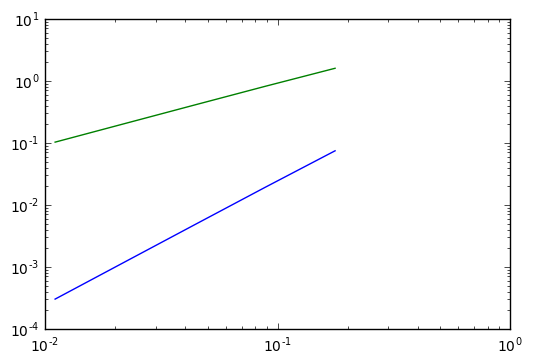

In [14]:
plt.loglog(hs, errsH0, hs, errsH1)